## TASK 3


# Pizza Place Sales Analysis
## A Comprehensive Analysis of Pizza Sales Data

**Objective:** Analyze pizza sales data to derive business insights and recommendations.

**By:** Jalloh Mohamed Lamarana

In [21]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#visualization style
sns.set_style("whitegrid")     # grid background
sns.set_palette("deep")        # color palette
sns.set_context("notebook")    # text size
%matplotlib inline


In [ ]:
#Importing Data sets

from google.colab import files
uploaded = files.upload()


In [ ]:
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv')


In [ ]:
orders.head()

,order_id,date,time
0,1,1/1/2015,11:38:36
1,2,1/1/2015,11:57:40
2,3,1/1/2015,12:12:28
3,4,1/1/2015,12:16:31
4,5,1/1/2015,12:21:30


In [ ]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [ ]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [ ]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


# **Joinig the datasets**

- order_details ↔ pizzas (by pizza_id)

- pizzas ↔ pizza_types (by pizza_type_id)

- orders ↔ order_details (by order_id)

In [ ]:
merged_df = pd.merge(order_details, pizzas, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_types, on='pizza_type_id')
merged_df = pd.merge(merged_df, orders, on='order_id')


In [ ]:
merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1/1/2015,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",1/1/2015,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",1/1/2015,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",1/1/2015,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",1/1/2015,11:57:40


In [ ]:
merged_df.shape

(48620, 12)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  date              48620 non-null  object 
 11  time              48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [ ]:
merged_df.isnull().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
pizza_type_id,0
size,0
price,0
name,0
category,0
ingredients,0


Total Price Column

In [ ]:
merged_df['total_price'] = merged_df['quantity'] * merged_df['price']


In [ ]:
total_price = merged_df['total_price']
total_price

,total_price
0,13.25
1,16.00
2,18.50
3,20.75
4,16.00
...,...
48615,16.75
48616,17.95
48617,12.00
48618,20.25


In [ ]:
merged_df[['quantity','price','total_price']].head()


,quantity,price,total_price
0,1,13.25,13.25
1,1,16.00,16.00
2,1,18.50,18.50
3,1,20.75,20.75
4,1,16.00,16.00


In [ ]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

merged_df.date

,date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
48615,2015-12-31
48616,2015-12-31
48617,2015-12-31
48618,2015-12-31


In [ ]:
merged_df['order_hour'] = merged_df['time'].str.split(':').str[0]

merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,11
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,11
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,11
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,11
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,11


In [ ]:
merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,11
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,11
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,11
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,11
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,11


In [ ]:

merged_df['month'] = merged_df['date'].dt.month_name()

In [ ]:
merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour,month
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,11,January
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,11,January
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,11,January
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,11,January
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,11,January


In [ ]:
merged_df.tail()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour,month
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31,21:23:10,16.75,21,December
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31,21:23:10,17.95,21,December
48617,48618,21348,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31,21:23:10,12.00,21,December
48618,48619,21349,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31,22:09:54,20.25,22,December
48619,48620,21350,bbq_ckn_s,1,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",2015-12-31,23:02:05,12.75,23,December


In [ ]:
merged_df['order_day'] = merged_df['date'].dt.day_name()

In [ ]:
merged_df[['date','time','order_hour']].head()

,date,time,order_hour
0,2015-01-01,11:38:36,11
1,2015-01-01,11:57:40,11
2,2015-01-01,11:57:40,11
3,2015-01-01,11:57:40,11
4,2015-01-01,11:57:40,11


In [ ]:
merged_df.columns


Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'pizza_type_id',
       'size', 'price', 'name', 'category', 'ingredients', 'date', 'time',
       'total_price', 'order_hour', 'month', 'order_day'],
      dtype='object')

In [ ]:
merged_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_hour,month,order_day
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,11,January,Thursday
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,11,January,Thursday
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,11,January,Thursday
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,11,January,Thursday
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,11,January,Thursday


In [ ]:
merged_df[['date','order_day','month','order_hour','total_price']].head(30)


,date,order_day,month,order_hour,total_price
0,2015-01-01,Thursday,January,11,13.25
1,2015-01-01,Thursday,January,11,16.00
2,2015-01-01,Thursday,January,11,18.50
3,2015-01-01,Thursday,January,11,20.75
4,2015-01-01,Thursday,January,11,16.00
5,2015-01-01,Thursday,January,11,20.75
6,2015-01-01,Thursday,January,12,16.50
7,2015-01-01,Thursday,January,12,20.75
8,2015-01-01,Thursday,January,12,16.50
9,2015-01-01,Thursday,January,12,16.50


In [ ]:
merged_df[['date','order_day','month','order_hour','total_price']].sample(n=10)


,date,order_day,month,order_hour,total_price
27124,2015-07-18,Saturday,July,19,16.00
43710,2015-11-24,Tuesday,November,17,25.50
34522,2015-09-12,Saturday,September,13,16.50
30515,2015-08-13,Thursday,August,13,12.50
29754,2015-08-07,Friday,August,21,14.50
4026,2015-01-31,Saturday,January,13,40.50
10255,2015-03-17,Tuesday,March,14,16.25
27292,2015-07-20,Monday,July,13,11.00
1733,2015-01-13,Tuesday,January,17,12.25
12752,2015-04-04,Saturday,April,18,16.00


In [ ]:
merged_df.to_csv('final_merged_dataset.csv', index=False)


NameError: name 'merged_df' is not defined

In [ ]:
from google.colab import files
files.download('final_merged_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
#Importing the merged Dataset

from google.colab import files
uploaded = files.upload()

Saving final_merged_dataset.csv to final_merged_dataset.csv


In [4]:
df= pd.read_csv ('/content/final_merged_dataset.csv')

In [5]:
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,order_day,order_hour,month
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,Thursday,11,January
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,Thursday,11,January
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,Thursday,11,January
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,Thursday,11,January
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,Thursday,11,January


  ## ANSWERS TO THE QUESTIONS

## **1**. **Total revenue**

In [6]:
total_revenue = df['total_price'].sum()
total_revenue


np.float64(817860.05)

The pizza place generated a total revenue of 817860.05 during the year.
This shows the overall financial performance of the business for the year.

## **2. Total Quantity Sold**

In [7]:
df['quantity'].sum()


np.int64(49574)

A total of 49574 pizzas were sold.
This indicates strong customer demand throughout the year.

## **3. Total Orders**

In [8]:
df['order_id'].nunique()


21350

The restaurant offers 21350 different pizza types.
This shows the menu variety available to customers.

## **4. Types of Pizza**

In [9]:
df['pizza_type_id'].nunique()


32

The restaurant has 32 different kinds of pizza

## **5. Average Pizza price**

In [10]:
df['price'].mean()


np.float64(16.494132044426163)

The average pizza price is 16.49.
This gives an idea of the general pricing level of the restaurant.

## **6. Peak Hours of Sales (Revenue)**

In [11]:
df['revenue'] = df['quantity'] * df['price']


In [65]:
peak_hours = df.groupby('order_hour')['revenue'].sum()
peak_hours

,revenue
order_hour,
9,83.00
10,303.65
11,44935.80
12,111877.90
13,106065.70
14,59201.40
15,52992.30
16,70055.40
17,86237.45


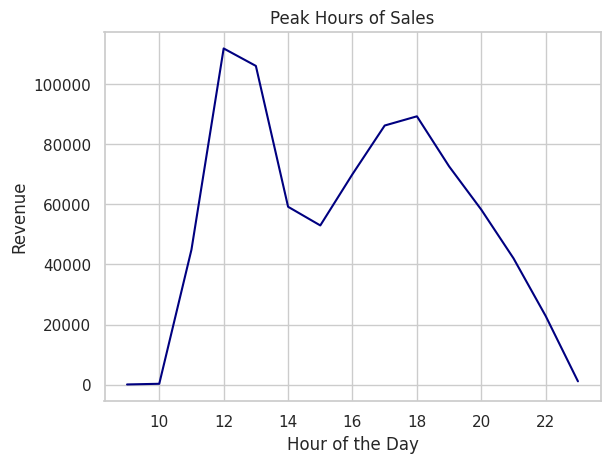

In [61]:


peak_hours.plot(color= 'navy')

plt.title('Peak Hours of Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Revenue')

plt.show()


Sales peak around 12:00, meaning this is the busiest time of the day where the restaurant generate more revenue.
These hours likely correspond to lunch time.
The business should ensure enough staff during these hours.

##**Peak Hours of Sales (Customer Trafic)**

In [67]:
peak_hour_customer_trafic = df.groupby('order_hour')['order_id'].nunique()
peak_hour_customer_trafic

,order_id
order_hour,
9,1
10,8
11,1231
12,2520
13,2455
14,1472
15,1468
16,1920
17,2336


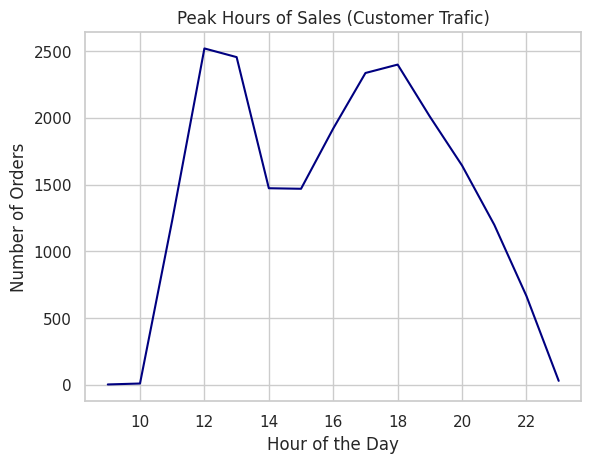

In [68]:
peak_hour_customer_trafic.plot(color= 'navy')

plt.title('Peak Hours of Sales (Customer Trafic)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

plt.show()

the number of orders is high around 12 to 1, and also 5 to 6 meaning this is the busiest time of the day where the restaurant receive more orders.
These hours likely correspond to lunch and Dinner time.

## **7. Sales by Day of the week**

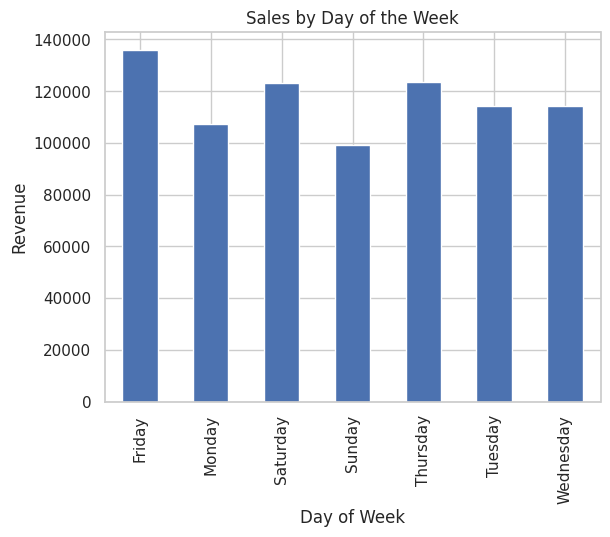

In [69]:
sales_day = df.groupby('order_day')['revenue'].sum()

sales_day.plot(kind='bar')

plt.title('Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')

plt.show()


The highest sales occur on **Friday**, while the lowest occur on **Sunday**.
This shows that customer activity is stronger on certain days.
The restaurant can plan promotions or staffing based on this pattern.

## **8. Top 5 Bestselling Pizzas**

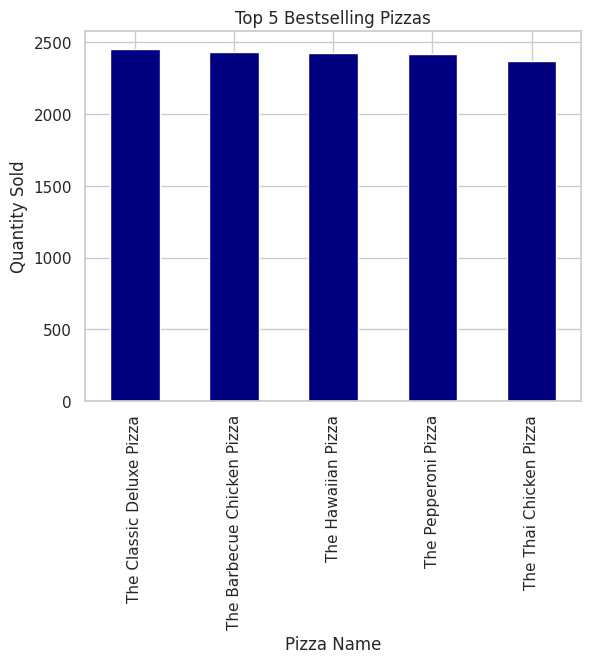

In [71]:
top5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

plt.title('Top 5 Bestselling Pizzas')
top5.plot(kind='bar', color ='navy')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Sold')

plt.show()


These pizzas are customer favorites and should always be available.
They can also be promoted further to increase revenue.

## **9. Monthly Sales Trend**

In [73]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [75]:
sales_month = df.groupby('month')['revenue'].sum()
sales_month = sales_month.reindex(month_order)



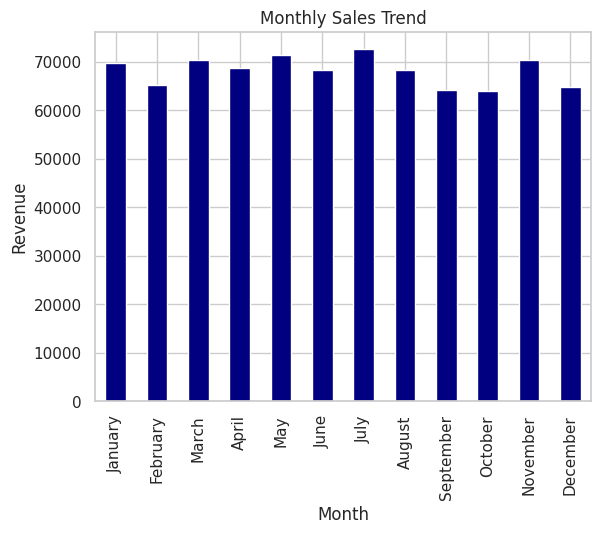

In [76]:
sales_month.plot(kind='bar', color= 'navy')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


Sales are highest in July month and lowest in September and October month.
their is almost Normal pattern.
This suggests seasonal patterns in customer demand.
External factors such as weather or holidays may influence this trend.

## **10. Worst Performing Pizzas**

In [26]:
worst = df.groupby('name')['quantity'].sum().sort_values().head(10)
worst


,quantity
name,
The Brie Carre Pizza,490
The Mediterranean Pizza,934
The Calabrese Pizza,937
The Spinach Supreme Pizza,950
The Soppressata Pizza,961
The Spinach Pesto Pizza,970
The Chicken Pesto Pizza,973
The Italian Vegetables Pizza,981
The Chicken Alfredo Pizza,987


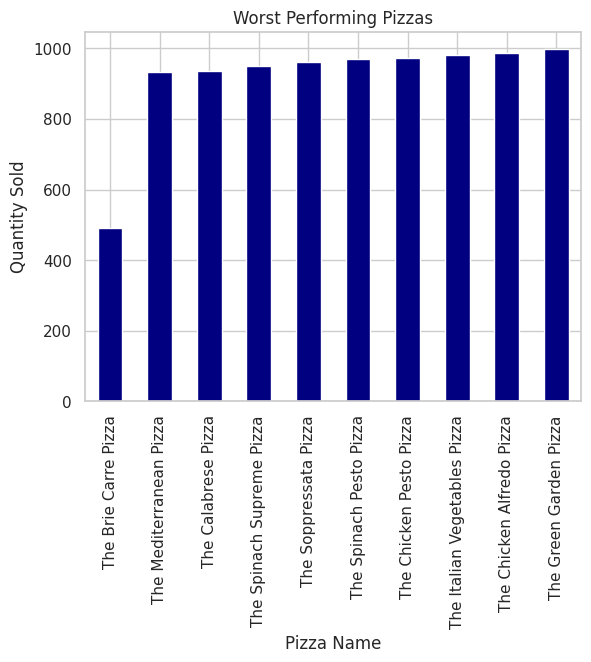

In [77]:
worst.plot(kind='bar', color= 'navy')

plt.title('Worst Performing Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Sold')
plt.show()

These pizza types may need better marketing, price adjustments, or removal from the menu.

## **Most Popular Pizza Size**

In [ ]:
df.groupby('size')['quantity'].sum().sort_values(ascending=False)


,quantity
size,
L,18956
M,15635
S,14403
XL,552
XXL,28


The most preferred pizza size is **L**.
This shows customer preference for this size over others.

## **Revenue by Pizza Category**

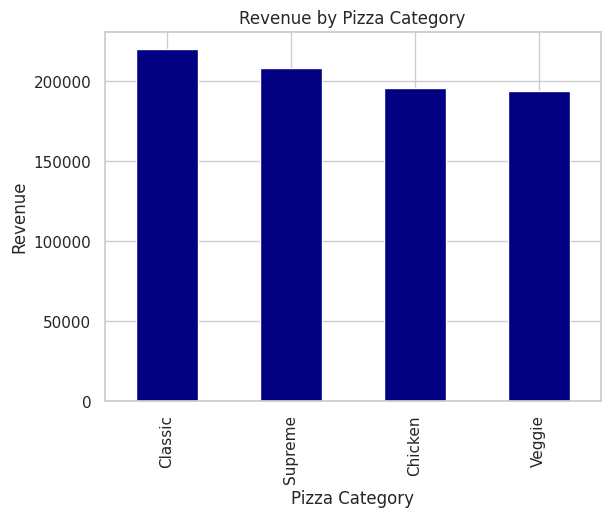

,revenue
category,
Classic,220053.10
Supreme,208197.00
Chicken,195919.50
Veggie,193690.45


In [78]:
cat_rev = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

cat_rev.plot(kind='bar', color= 'navy')

plt.title('Revenue by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Revenue')
plt.show()

cat_rev


The category generating the highest revenue is **CLASSIC**.
This category plays a key role in overall profitability.

## **Revenue vs Quantity**

In [31]:
pizza_perf = df.groupby('name').agg({
    'quantity':'sum',
    'revenue':'sum'
}).sort_values(by='revenue', ascending=False)

pizza_perf.head(10)


,quantity,revenue
name,,
The Thai Chicken Pizza,2371,43434.25
The Barbecue Chicken Pizza,2432,42768.00
The California Chicken Pizza,2370,41409.50
The Classic Deluxe Pizza,2453,38180.50
The Spicy Italian Pizza,1924,34831.25
The Southwest Chicken Pizza,1917,34705.75
The Italian Supreme Pizza,1884,33476.75
The Hawaiian Pizza,2422,32273.25
The Four Cheese Pizza,1902,32265.70


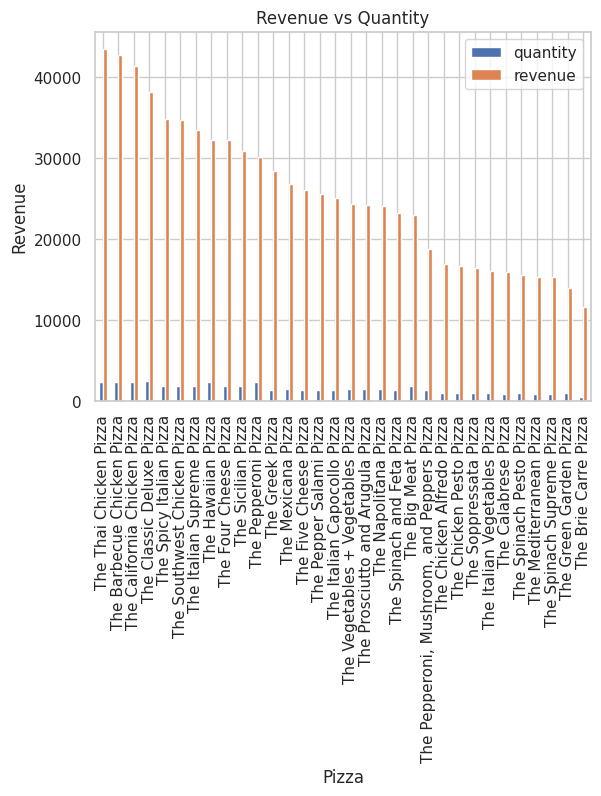

In [32]:
pizza_perf.plot(kind='bar')

plt.title('Revenue vs Quantity')
plt.xlabel('Pizza')
plt.ylabel('Revenue')
plt.show()

## **Top 5 prefered Pizza**

<Figure size 1000x600 with 0 Axes>

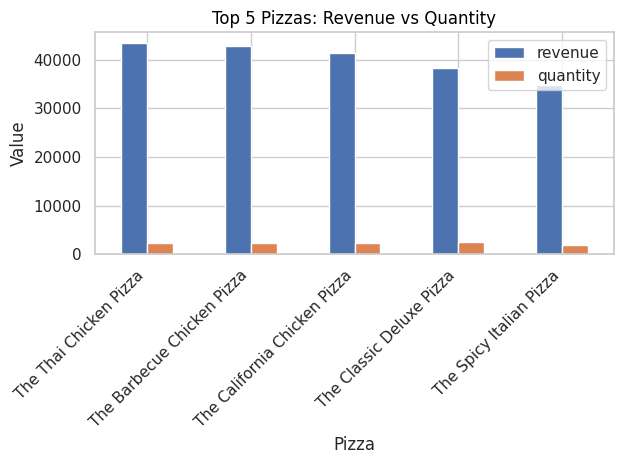

In [60]:
top5 = pizza_perf.head(5)

plt.figure(figsize=(10,6))

top5[['revenue','quantity']].plot(kind='bar')

plt.title('Top 5 Pizzas: Revenue vs Quantity', color='black')
plt.xlabel('Pizza')
plt.ylabel('Value',)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Average Revenue per Order by Hour

In [37]:
avg_hour = df.groupby('order_hour')['revenue'].mean()

avg_hour


,revenue
order_hour,
9,20.750000
10,17.861765
11,16.817290
12,17.098869
13,17.099097
14,16.813803
15,16.716814
16,16.739642
17,16.767927


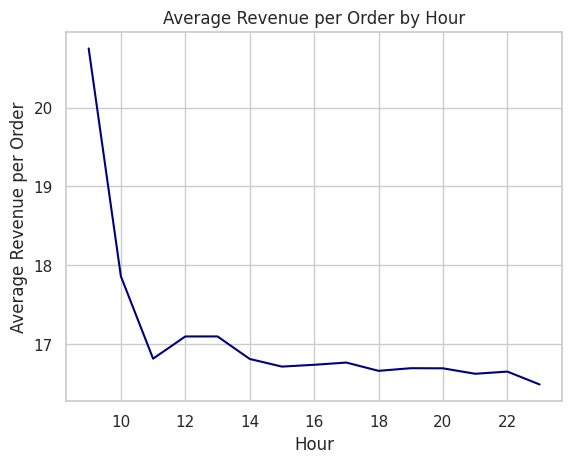

In [48]:
avg_hour.plot(color = 'navy')

plt.title('Average Revenue per Order by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Revenue per Order')
plt.show()

Number of orders per day (customer trafic)

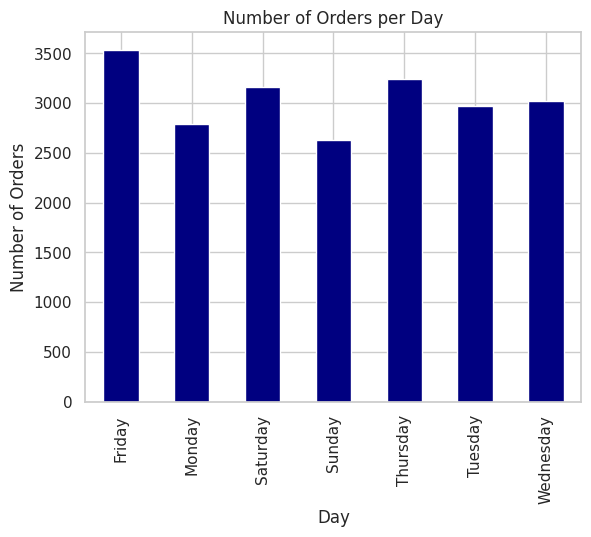

In [47]:
orders_day = df.groupby('order_day')['order_id'].nunique()

orders_day.plot(kind='bar', color = 'navy')

plt.title('Number of Orders per Day')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.show()


Top 5 Revenue Generating Pizzas

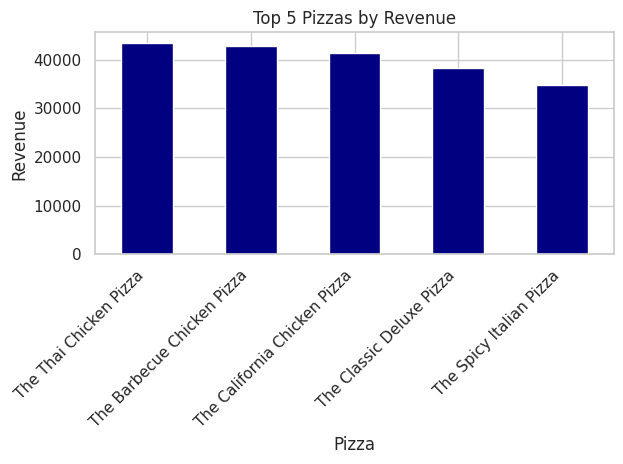

In [42]:
top_rev = df.groupby('name')['revenue'].sum().sort_values(ascending=False).head(5)

top_rev.plot(kind='bar', color='navy')

plt.xlabel('Pizza')
plt.ylabel('Revenue')
plt.title('Top 5 Pizzas by Revenue')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



Ingredient Insight

In [ ]:
top_names = top_rev.index
df[df['name'].isin(top_names)]['ingredients'].value_counts().head(10)


,count
ingredients,
"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon",2416
"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",2372
"Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce",2315
"Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",2302
"Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic",1887


Correlation Between Price and Quantity

In [53]:
df[['price','quantity']].corr()


,price,quantity
price,1.000000,0.007142
quantity,0.007142,1.000000


In [54]:
df['revenue'] = df['quantity'] * df['price']


In [55]:
corr_data = df[['price', 'quantity', 'revenue']]
corr = corr_data.corr()
corr


,price,quantity,revenue
price,1.000000,0.007142,0.836087
quantity,0.007142,1.000000,0.541926
revenue,0.836087,0.541926,1.000000


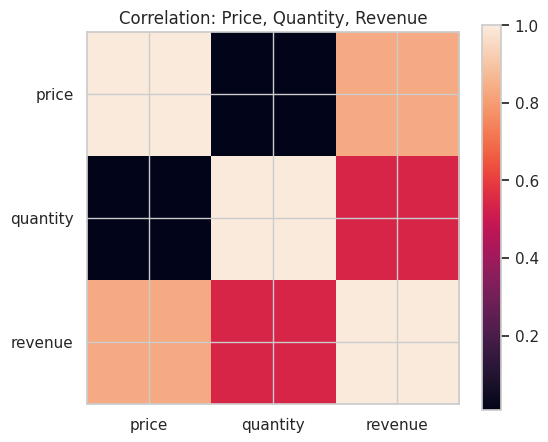

In [59]:
plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title('Correlation: Price, Quantity, Revenue')
plt.show()


Quantity and revenue show a strong positive relationship, meaning more pizzas sold leads to higher revenue.

If price and quantity show a negative relationship, it suggests higher prices reduce demand.